# Linear Regression MNIST
#### By Shah Zafrani



In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the libraries we need
print("Libraries {}, {} and {} have been imported".format(np.__name__, pd.__name__, plt.__name__))

Libraries numpy, pandas and matplotlib.pyplot have been imported


In [89]:
# read in the data
training = pd.read_csv('../datasets/MNIST_training.csv')
# display the data so that we can visualize what we're working with
# print(training.head())
# take the first column of values containing the labels
training_Y = training.iloc[:, 0].as_matrix()
# take only the pixel data and output it as a numpy array
training_X = training.drop('label', axis=1).as_matrix()
test = pd.read_csv('../datasets/MNIST_test.csv')
test_Y = test.iloc[:, 0].as_matrix()
test_X = test.drop('label', axis=1).as_matrix()

50

In [83]:
# Hyper Parameters
learning_rate = 1e-6 # play with this to get different results?
threshold = 0.5 # provided by Dr. Kang
step_iterations = 100 # how many gradient descent steps to take
num_features = len(training_X[0])

In [95]:
def normalize(vector_of_values, range_of_values):
    # min-max normalization: each pixel values divided by 255. 
    return vector_of_values / range_of_values

def linear_regression(X, y):
    return np.dot(np.dot(np.linalg.pinv(np.dot(X.transpose(), X)), X.transpose()), y)

def cost(X, y, b): # taken from Dr. Kang's lecture code
    return np.sum((np.dot(X, b) - np.array(y))**2)

def calculate_gradient_descent_step(X, y, b):
    return -np.dot(X.transpose(), y) + np.dot(np.dot(X.transpose(), X) ,b)

def predict_class(X, b, threshold):
    #return an array of boolean values
    return np.array(np.dot(X, b) > threshold)

def calculate_accuracy(X, Y, b, threshold):
    total = sum(predict_class(X, b, threshold) == Y) 
    accuracy = float(total / len(Y))
    return accuracy



0.0


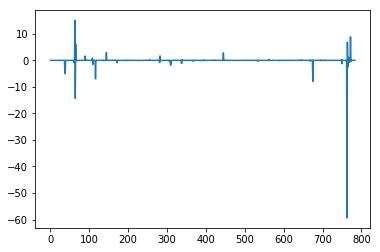

In [96]:
b_optimal = linear_regression(training_X, training_Y)
accuracy_check = calculate_accuracy(test_X, test_Y, b_optimal, threshold)
print(accuracy_check)
plt.plot(b_optimal)

In [ ]:
b_estimate = np.zeros(num_features)
costs = []

for i in range(0, step_iterations):
    b_estimate = b_estimate - learning_rate * calculate_gradient_descent_step(training_X, training_Y, b_estimate)
    error = cost(training_X, training_Y, b_estimate)
    costs.append(error)

plt.plot(costs)
print("Accuracy: {}".format(calculate_accuracy(test_X, test_Y, b_estimate, threshold)))

In [87]:
sum(abs(b_optimal - b_estimate))

nan